In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
import seaborn as sns
import os

In [2]:
directory = 'subpopulation_analysis/'

In [11]:
all_files = os.listdir(directory)

all_subpops = ['Tcell', 'Bcell', 'Activated', 'Proli']
all_metrics = ['num_nodes','num_edges']

dic = {}

for subpop in all_subpops:
    
    subpop_files = []

    for filename in all_files:
        if subpop in filename:
            subpop_files.append(directory + filename)
            # FIX THIS!!!
            # dic[subpop] = filename.replace('.csv','').replace('FA')
            
        for filename in subpop_files:
            if 'FA1' in filename:
                young = pd.read_csv(filename)
            elif 'FA2' in filename:
                old = pd.read_csv(filename)
            elif 'FA3' in filename:
                pn = pd.read_csv(filename)
            else:
                print("Error: no FA1, FA2, or FA3 match in filename")
        

    for metric in all_metrics:

        pn_df = pd.DataFrame({'group' : np.repeat('pn',len(pn)), metric : pn[metric]})
        young_df = pd.DataFrame({'group' : np.repeat('young',len(young)), metric : young[metric]})
        old_df = pd.DataFrame({'group' : np.repeat('old',len(old)), metric : old[metric]})

        all_df = pn_df.append(young_df).append(old_df)

        sns_fig = sns.boxplot(x='group',y=metric,data=all_df, palette="Blues")
        ax = sns.stripplot(x='group', y=metric, data=all_df, color="purple", jitter=0.2, size=2.5)
        plt.title(dic[subpop] + " " + metric)
        
        for patch in ax.artists:
         r, g, b, a = patch.get_facecolor()
         patch.set_facecolor((r, g, b, .5))

        fig = sns_fig.get_figure()
        fig.savefig("subpopulation_graphs/" + dic[subpop] + "_" + metric + ".png",dpi=600)
        plt.clf()

<Figure size 432x288 with 0 Axes>

In [4]:
pn['entropy_per_node'] = pn['giulia_spatial_entropy'] / pn['num_nodes']
young['entropy_per_node'] = young['giulia_spatial_entropy'] / young['num_nodes']
old['entropy_per_node'] = old['giulia_spatial_entropy'] / old['num_nodes']


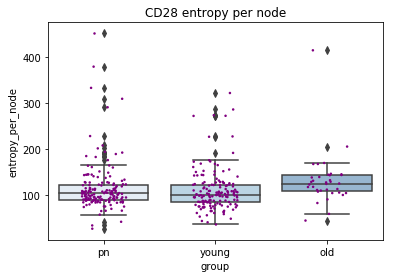

In [5]:
pn_df = pd.DataFrame({'group' : np.repeat('pn',len(pn)), 'entropy_per_node' : pn['entropy_per_node']})
young_df = pd.DataFrame({'group' : np.repeat('young',len(young)), 'entropy_per_node' : young['entropy_per_node']})
old_df = pd.DataFrame({'group' : np.repeat('old',len(old)), 'entropy_per_node' : old['entropy_per_node']})

all_df = pn_df.append(young_df).append(old_df)

sns_fig = sns.boxplot(x='group',y='entropy_per_node',data=all_df, palette="Blues")
ax = sns.stripplot(x='group', y='entropy_per_node', data=all_df, color="purple", jitter=0.2, size=2.5)
plt.title(subpop + " entropy per node")

for patch in ax.artists:
 r, g, b, a = patch.get_facecolor()
 patch.set_facecolor((r, g, b, .5))

fig = sns_fig.get_figure()
fig.savefig("subpopulation_graphs/" + subpop + "_entropy_per_node.png",dpi=600)